In [1]:
import cv2
import joblib
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from script.dataset import load_vehicle_dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from script.feature_source import FeatureExtracter
from sklearn.model_selection import train_test_split
from script.feature_source import FeatureExtracter
from script.training import training_model
from script.slider import Slider
from script.helpers import put_boxes, show_images
from script.model_localization import pyramid, sliding_window, iou_bbox, non_maximum_supperssion, visualize_bbox

In [2]:
sourcer_params = {
  'color_model': 'yuv',                # hls, hsv, yuv, ycrcb,
  'spatial_size': (64, 64),            # (16, 16), (32, 32), (64, 64)
  'orientations': 9,        # 6 - 12
  'pixels_per_cell': 8,               # 8, 16
  'cells_per_block': 2,                # 1, 2
  'transform_sqrt': True,
  'block_norm': 'L2',
  'hog_visualize': False
}
exist_path = './save_model/model.pkl'
save_path = './save_model'
feature_extracter = FeatureExtracter(**sourcer_params)

In [3]:
X, y = load_vehicle_dataset()
feature_extracter = FeatureExtracter(**sourcer_params)
model = training_model(X, y, feature_extracter, './save_model', evaluate=False)

Loaded dataset in 5.01 seconds
Vehicle images shape:  (8792, 64, 64, 3)
Non-vehicle images shape:  (8968, 64, 64, 3)
Loading model...


In [4]:
# load the image and define the window width and height
image_path = './test_images/test4.jpg'
thresh = 0.8
image = cv2.imread(image_path)
windowSize = [(80, 80), (50, 50)]

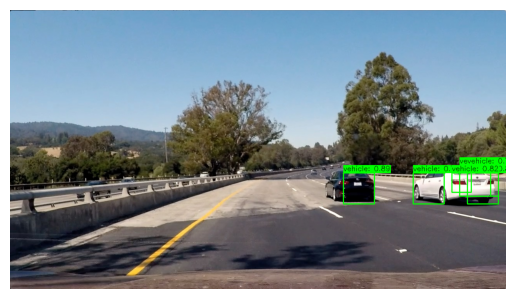

In [6]:
predict_bbox = []
slider = Slider(model, None, 20, scale=1, strip_position=(400, 421), visualize=False)
for window_size in windowSize:
    slider.update_window_size(window_size)
    predict_bbox += slider.predict(image, 0.7)
#predict_bbox = non_maximum_supperssion(predict_bbox, 0.2)
visualize_bbox(image, predict_bbox)

In [10]:
def bounding_boxes_test(this_frame, ws, wp):
    
  boxed_images = []
  strips = []
  slider = Slider(model, None, 20, scale=1, strip_position=(wp, 421), visualize=False)
  for ws, wp in zip(ws, wp):
    slider.update_window_size((ws, ws))
    slider.update_strip_position((wp, 421))
    bounding_boxes = slider.predict(this_frame, 0.5)
    img = put_boxes(image, bounding_boxes)
    boxed_images.append(img)
    strips.append(slider.curent_strip)

  show_images(strips, per_row = len(strips), per_col = 1, W = 30, H = 3)
  show_images(boxed_images, per_row = len(boxed_images), per_col = 1, W = 30, H = 10)

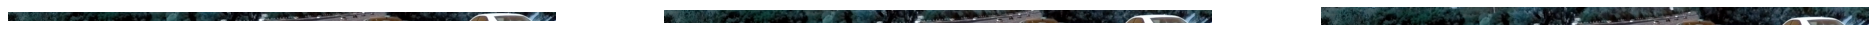

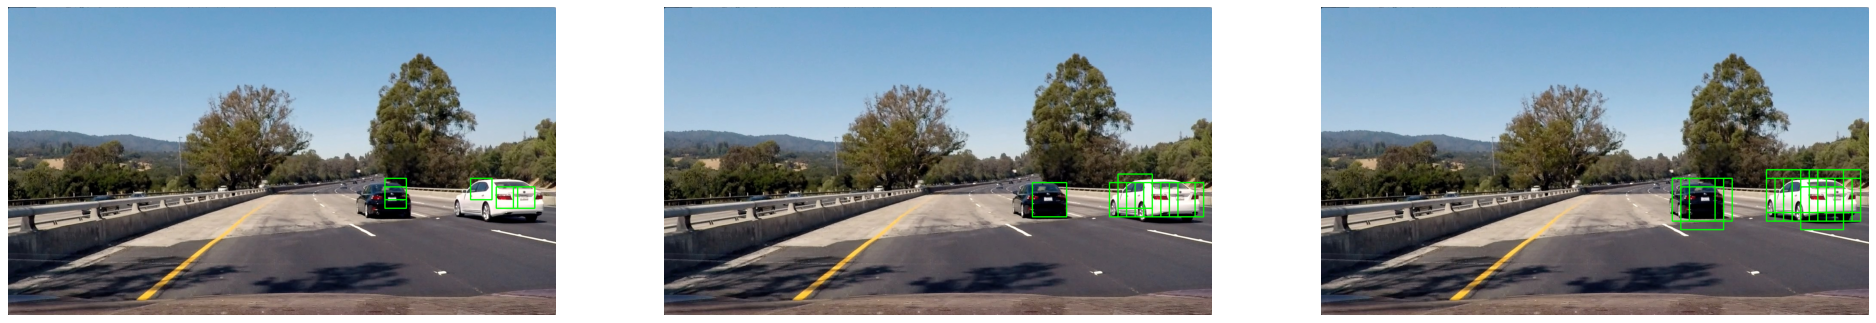

In [11]:
ws = 50, 80, 100
wp = 400, 390, 380

frame1 = cv2.imread(image_path)
bounding_boxes_test(frame1, ws, wp)